# Exploring data analise

Сделайте для своих данных разведочный анализ данных, Exploratory Data Analysis (EDA). Выясните, какие в данных есть особенности, визуализируйте их. Ваша задача — откопать в данных интересные закономерности и построить для них красивые, понятные визуализации, на основе которых можно выдвинуть гипотезы и создать для датасета новые переменные.

Оценка за этот пункт зависит от сложности графиков и интересных идей, которые можно из них заметить.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Preprocessing/Great_BD.tsv', delimiter = "\t")
data.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,OTG,Infrared,Lightning,Quad-Band,Tri-Band,Wireless charging,WAP,WCDMA,Last_Sale,Is_Target
0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...,Very Good - Refurbished,“This iPhone 11 is in Very Good condition and ...,apple,iPhone 11,...,0.0,0,0.0,0,0,0.0,0,0,2023-06-14 00:00:00,0
1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...,Very Good - Refurbished,“This Apple iPhone XR 64GB Factory Unlocked Sm...,apple,iPhone XR,...,0.0,0,0.0,0,0,0.0,0,0,2023-06-14 00:00:00,0
2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",apple,Apple iPhone 11,...,0.0,0,0.0,0,0,0.0,0,0,2023-06-14 00:00:00,0
3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",apple,Apple iPhone X,...,1.0,1,1.0,1,1,1.0,1,1,2023-06-14 00:00:00,0
4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",apple,Apple iPhone X,...,0.0,0,0.0,0,0,0.0,0,0,2023-06-14 00:00:00,0


## Описание столбцов:

* `Title` - Название устройства
* `Price` - Цена устройства
* `Shipping_cost` - Стоимость доставки
* `Sales_Count` - Количество продаж
* `Sales_Value` - Выручка
* `Link` - Ссылка на устройство
* `Condition` - Состояние устройства
* `Seller Notes` - Заметки продавца
* `Brand` - Бренд
* `Model` - Модель
* `Storage Capacity` - Объём встроенной памяти
* `Network` - Сети
* `Camera Resolution` - Разрешение камеры
* `Screen Size` - Размер экрана
* `Lock Status` - Смартфон заблокирован оператором\смартфон разблокирован
* `RAM` - Объём оперативной памяти
* `Contract` - Контракт, что бы это не значило
* `Operating System` - Операционная система
* `Model Number` - Номер модели
* `Style` - Стиль (Смартфон, раскладушка и т.д.)
* `MPN` -
* `Connectivity` - Доступные протоколы подключения
* `Features` - Доступные функции
* `SIM Card Slot` - Слоты симкарт
* `Memory Card Type` - Поддержка карт памяти
* `Processor` - Процессор
* `Color` - Цвет
Следующие характеристики закодированы через One-Hot encoding (0-нет, 1 - есть). Их подробное описание не имеет смысла.
* `2G`
* `3G`
* `4G`
* `5G`
* `Bluetooth`
* `GSM`
* `WI-FI`
* `Micro USB`
* `USB`
* `Type-C`
* `Fast_usb`
* `NFC`
* `Dual-Band`
* `ANT+`
* `Android Beam`
* `Beidou`
* `Cellular`
* `FM`
* `DLNA`
* `EDGE`
* `Fast Charge`
* `GPS`
* `Galileo`
* `Global Version`
* `HDMI Micro`
* `Glonass`
* `Headphone Jack`
* `OTA`
* `OTG`
* `Infrared`
* `Lightning`
* `Quad-Band`
* `Tri-Band`
* `Wireless charging`
* `WAP`
* `WCDMA`
* `Last_Sale`

* `Is_Target` - 0 - сборная солянка, по которой обучалась модель. 1 - redmi и nokia на которых модель применялась. Флаг для сегрегации.

___

C:\Users\druny\AppData\Local\Temp\ipykernel_11900\3316478535.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(brands))  # Генерируем цвета из цветовой карты
C:\Users\druny\AppData\Local\Temp\ipykernel_11900\3316478535.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(brand_data['Price'], brand_data['Sales_Count'], c=colors(i), label=brand)


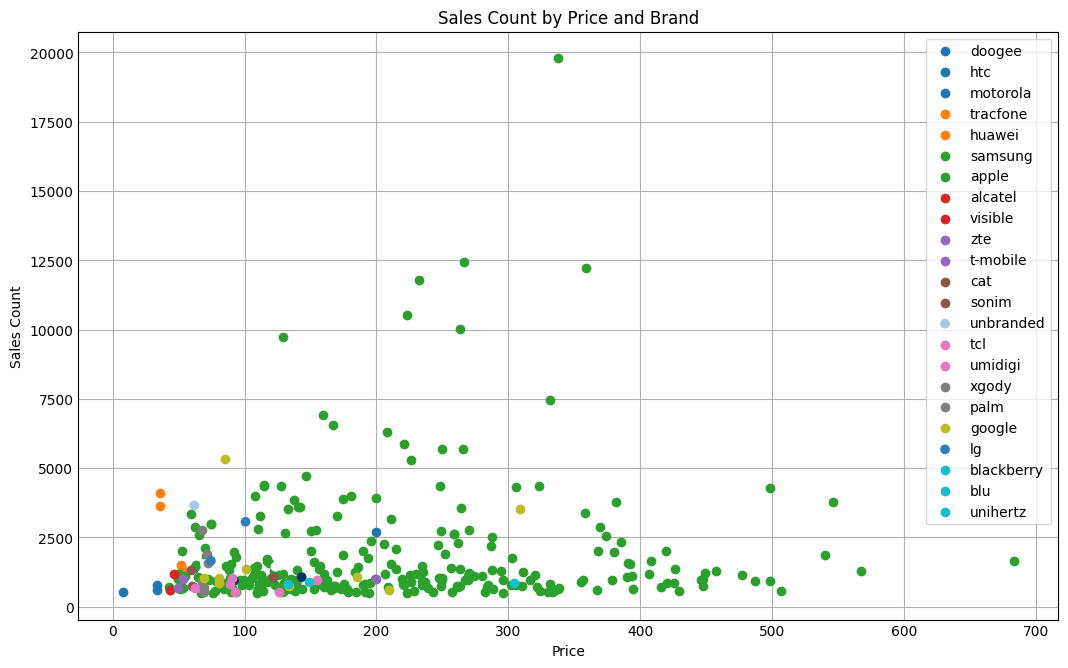

In [42]:
# make data:
PBS = data[data.Is_Target==0].groupby(by=["Price", "Brand"]).agg({"Sales_Count": sum})
PBS = PBS[PBS['Sales_Count']>500]
PBS.reset_index(inplace=True)

# Создаем график рассеяния с разными цветами и размером
plt.figure(figsize=(10, 6))

brands = PBS['Brand'].unique()
colors = plt.cm.get_cmap('tab10', len(brands))  # Генерируем цвета из цветовой карты

for i, brand in enumerate(brands):
    brand_data = PBS[PBS['Brand'] == brand]
    plt.scatter(brand_data['Price'], brand_data['Sales_Count'], c=colors(i), label=brand)

plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.title('Sales Count by Price and Brand')
plt.legend()
plt.show()

C:\Users\druny\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


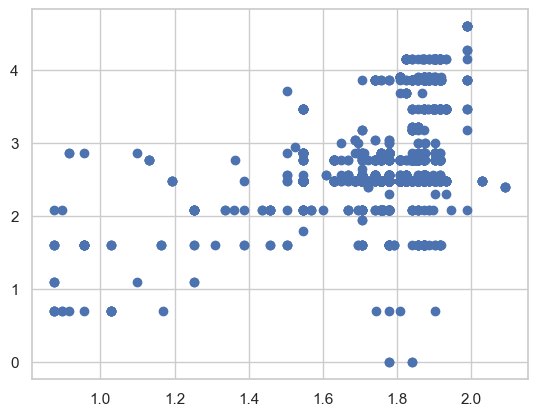

In [72]:
plt.scatter(np.log(data["Screen Size"][data.Is_Target==0]), np.log(data["Camera Resolution"][data.Is_Target==0]))
plt.show()

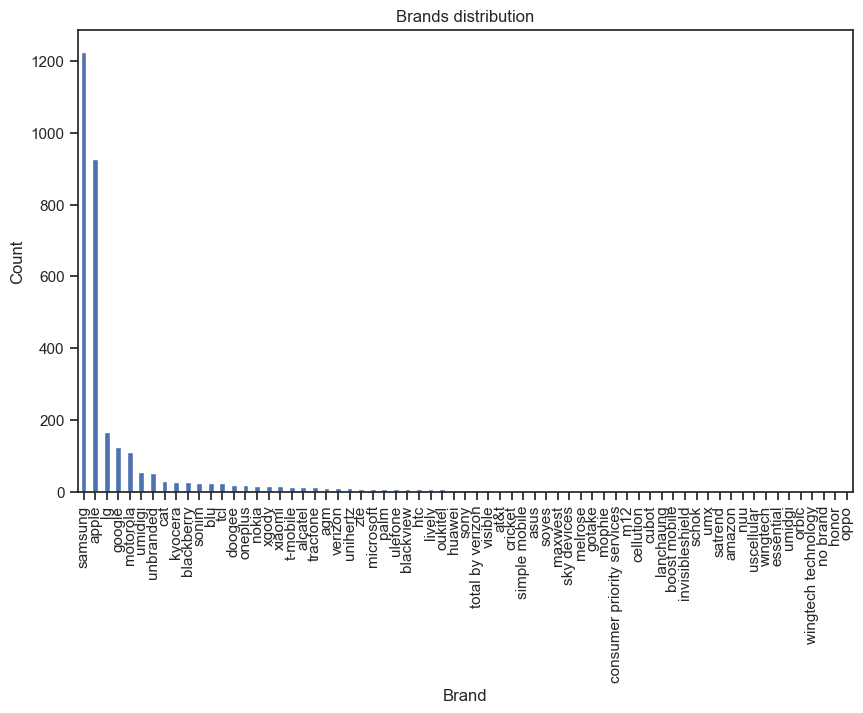

In [33]:
# Гистограмма распределения брендов
brands = data.Brand[data.Is_Target==0].value_counts()
plt.figure(figsize=(10,6))
brands.plot(kind='bar', color='b')
plt.title('Brands distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

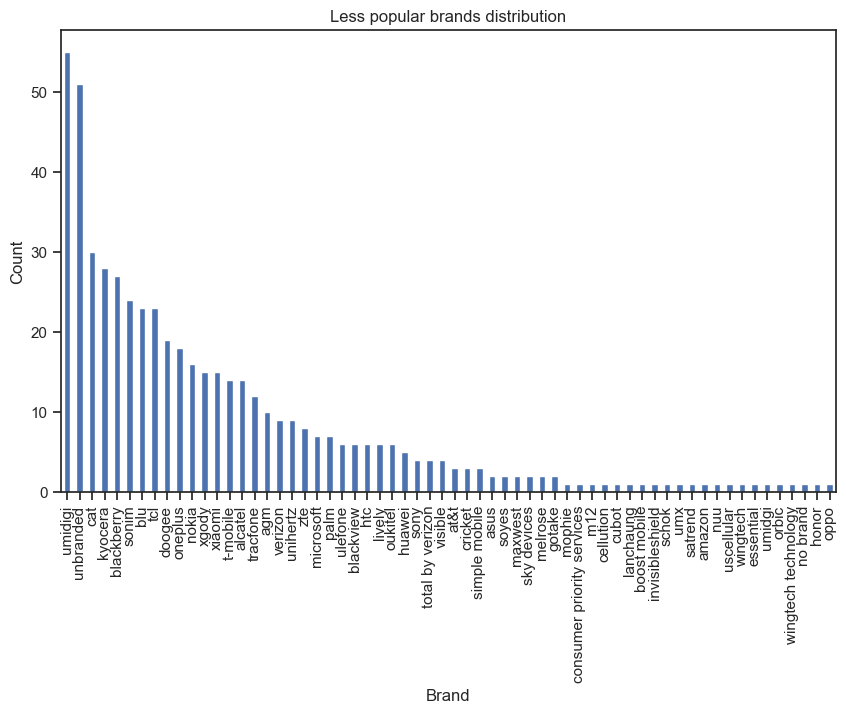

In [34]:
plt.figure(figsize=(10,6))
brands[brands<100].plot(kind='bar', color='b')
plt.title('Less popular brands distribution')
plt.xlabel('Brand')
plt.ylabel('Sales_Count')
plt.show()

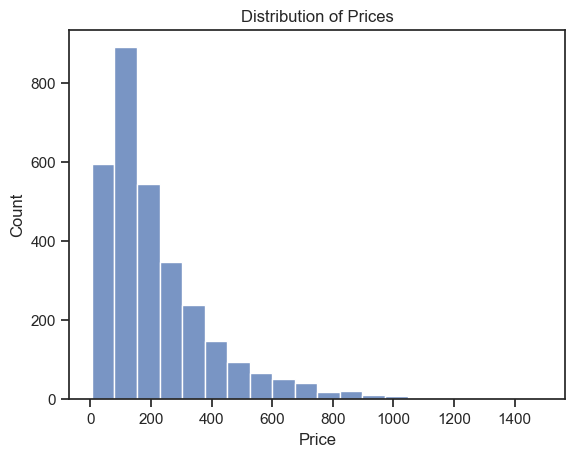

In [35]:
# Гистограмма распределения цен
sns.histplot(data[data.Is_Target==0]['Price'], bins=20)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

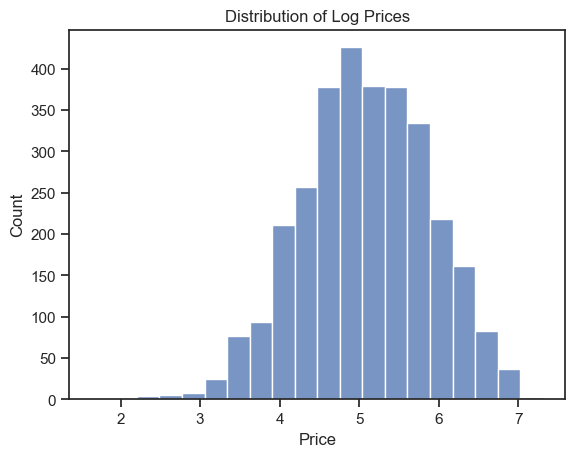

In [36]:
# Гистограмма распределения логарифма цен
sns.histplot(np.log(data[data.Is_Target==0]['Price']), bins=20)
plt.title('Distribution of Log Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Проверить что нормальное распределение

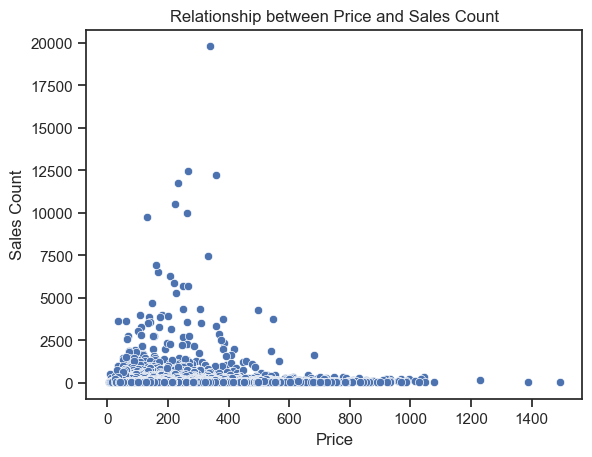

In [37]:
# Диаграмма рассеяния количества продаж и стоимости товаров
sns.scatterplot(x='Price', y='Sales_Count', data=data[data.Is_Target==0])
plt.title('Relationship between Price and Sales Count')
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.show()

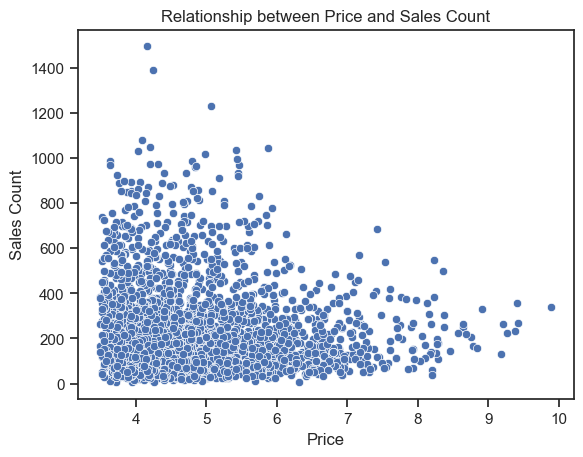

In [38]:
Price_Sales = data[data.Is_Target==0][["Price", "Sales_Count"]]
Price_Sales["Sales_Count_log"] = Price_Sales.Sales_Count.apply(lambda x: np.log(x))
sns.scatterplot(x='Sales_Count_log', y= 'Price', data=Price_Sales)
plt.title('Relationship between Price and Sales Count')
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.show()

Проверить, что нормальное распределение.

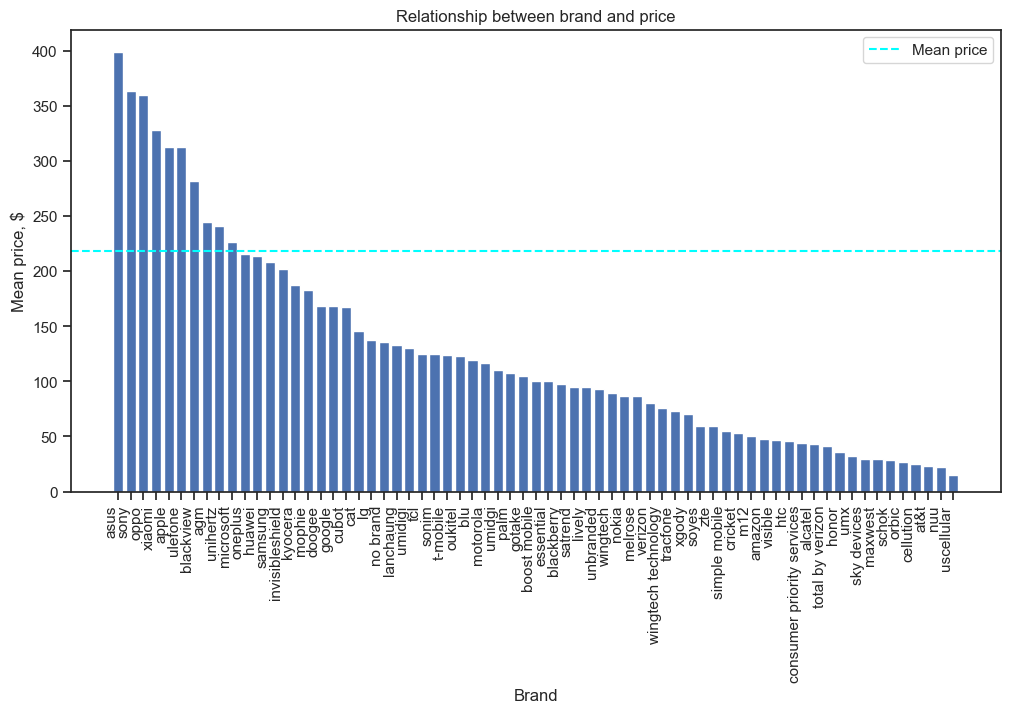

In [39]:
# Диаграмма распределения брендов и  средних цен
brand_prices = data[data.Is_Target==0].groupby('Brand').agg({'Price': 'mean'}).sort_values(by='Price', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(brand_prices.index, brand_prices['Price'])
plt.axhline(y=data[data.Is_Target==0].Price.mean(), c="cyan", linestyle='--', label='Mean price')
ax.set_xlabel('Brand')
ax.set_ylabel('Mean price, $')
ax.set_title('Relationship between brand and price')

plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

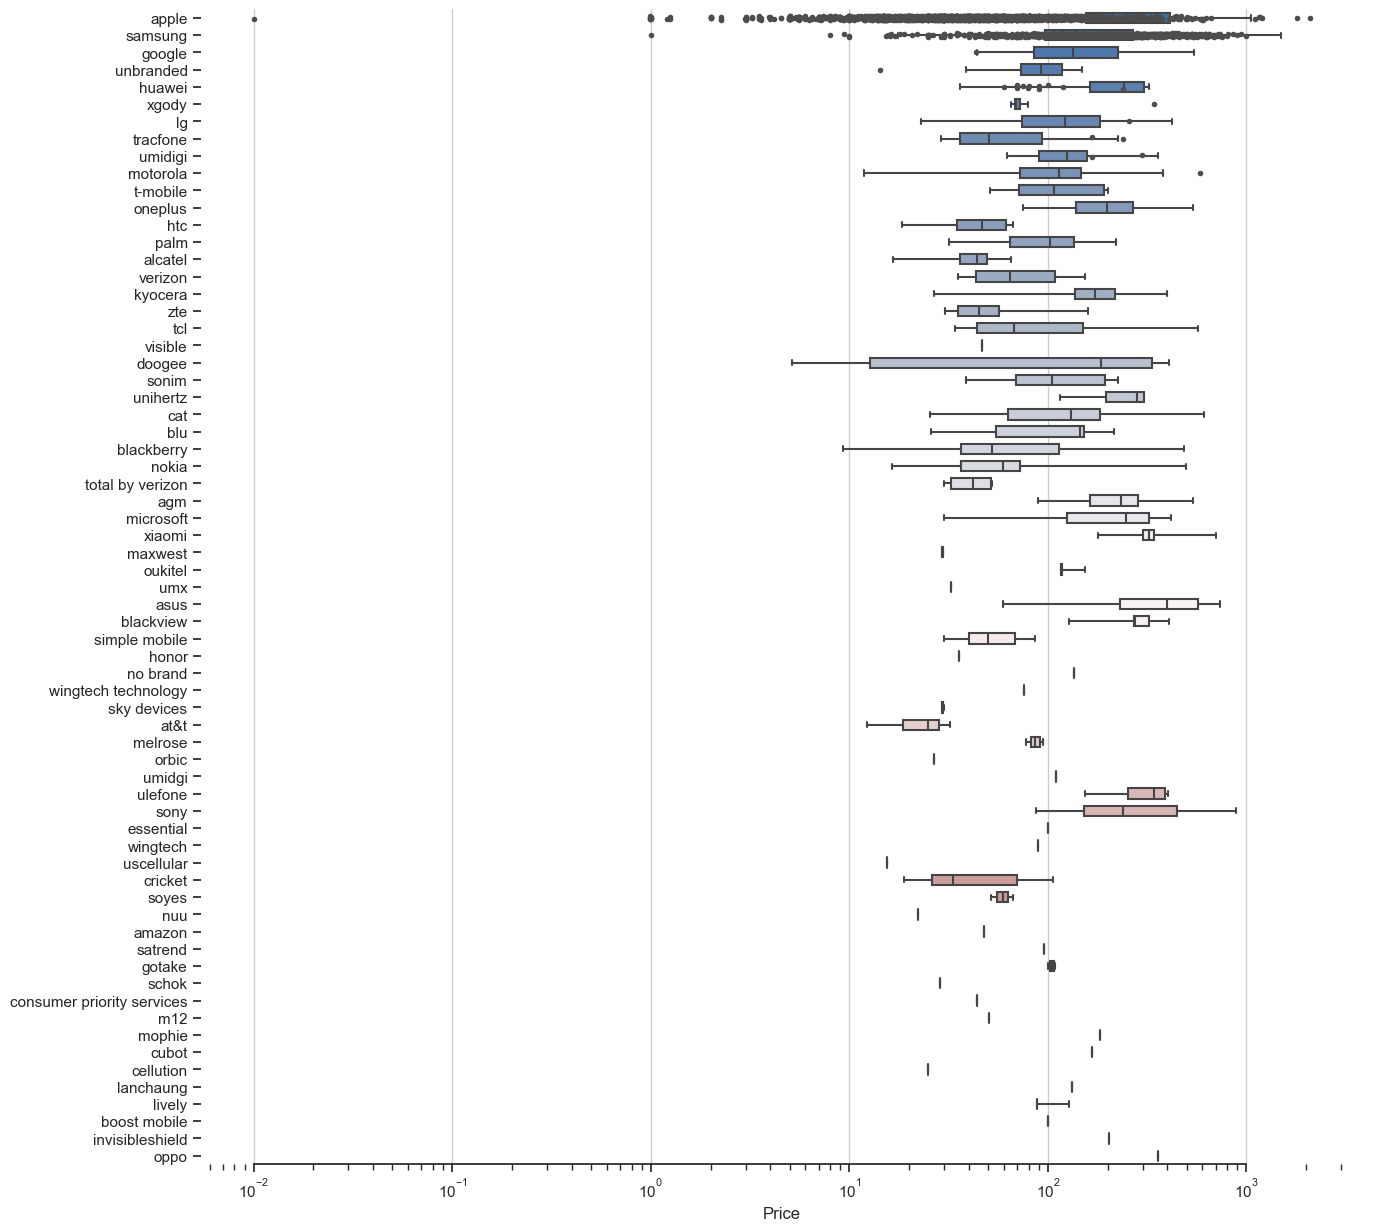

In [32]:
#Графики с усами для распределения цен по брендам
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15, 15))
ax.set_xscale("log")
sns.boxplot(x="Price", y="Brand", data=data[data.Is_Target==0],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="Price", y="Brand", data=data[data.Is_Target==0],
              size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

C:\Users\druny\AppData\Local\Temp\ipykernel_27080\3444883545.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data[data.Is_Target==0].corr()


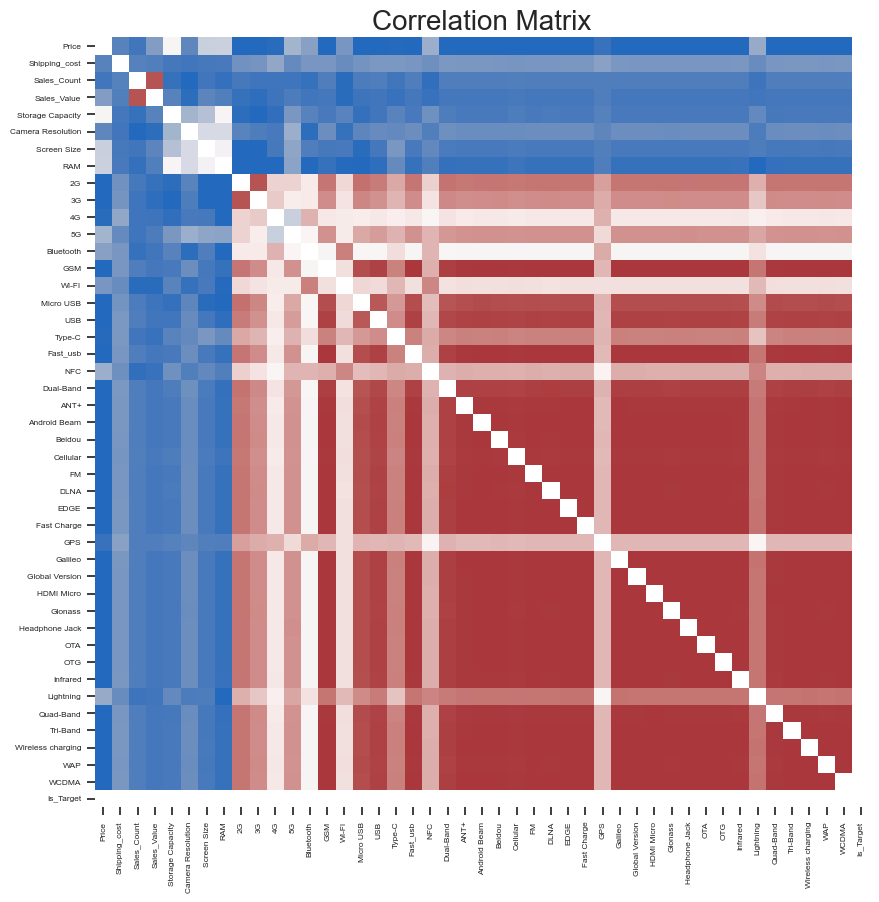

In [41]:
#Посмотрим-ка на корреляционную матрицу
cor = data[data.Is_Target==0].corr()
np.fill_diagonal(cor.values, np.nan)
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cmap='vlag', cbar=False, annot=False, robust = True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

C:\Users\druny\AppData\Local\Temp\ipykernel_27080\240839668.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data[data.Is_Target==0].corr()


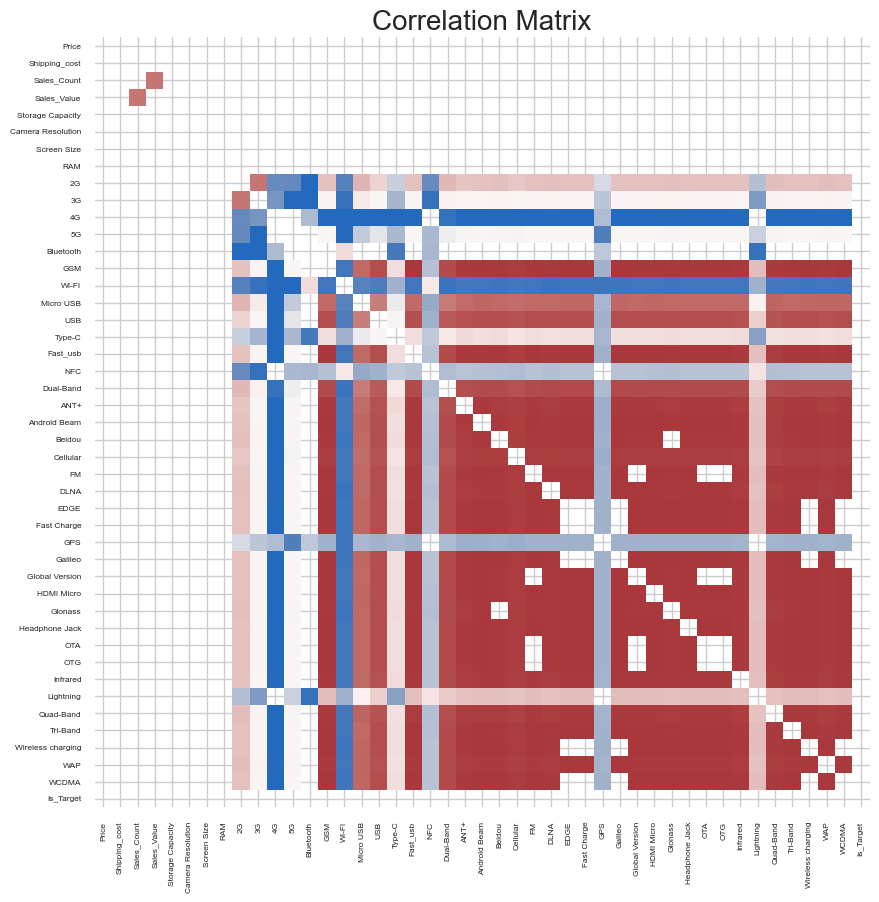

In [58]:
#Посмотрим-ка на корреляционную матрицу
cor = data[data.Is_Target==0].corr()
cor = cor[(0.5<np.abs(cor)) & (np.abs(cor)<1)]
np.fill_diagonal(cor.values, np.nan)
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cmap='vlag', cbar=False, annot=False, robust = True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()